### **Productivity Prediction of Garment Industry Employees**

#### **Objectives**
1. Create a model that can predict the level of productivity of employee teams in the garment industry.

#### **Data source and column explanations**
Column definitions:

1. date : Date in MM-DD-YYYY
2. day : Day of the Week
3. quarter : A portion of the month. A month was divided into four quarters
4. department : Associated department with the instance
5. team_no : Associated team number with the instance
6. no_of_workers : Number of workers in each team
7. no_of_style_change : Number of changes in the style of a particular product
8. targeted_productivity : Targeted productivity set by the Authority for each team for each day.
9. smv : Standard Minute Value, it is the allocated time for a task
10. wip : Work in progress. Includes the number of unfinished items for products
11. over_time : Represents the amount of overtime by each team in minutes
12. incentive : Represents the amount of financial incentive (in BDT/ Bangladeshi Taka) that enables or motivates a particular course of action.
13. idle_time : The amount of time when the production was interrupted due to several reasons
14. idle_men : The number of workers who were idle due to production interruption
15. actual_productivity : The actual % of productivity that was delivered by the workers.

In [1]:
# import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
garment = pd.read_csv('../data/garments_worker_productivity.csv')
garment.head(5)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [3]:
# checking the shape of the dataset
garment.shape

(1197, 15)

In [4]:
#Checking datatypes, null counts
garment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

### 3. EDA and Data Cleaning

In [5]:
#renaming ambiguous columns
garment = garment.rename(columns={'wip': 'work_in_progress', 'smv':'std_minute_value'})

In [6]:
# separating variables for ease of analysis to those that can
# be considered numerical and categorical  
categorical = ["quarter", "department", "day", "team"]
numerical = ['targeted_productivity', 'std_minute_value', 'work_in_progress', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers', 'actual_productivity']

In [7]:
#checking for anomalies for the categoraical data columns

for col in categorical:
  print(col)
  print(garment[col].unique())
  print('\n')

quarter
['Quarter1' 'Quarter2' 'Quarter3' 'Quarter4' 'Quarter5']


department
['sweing' 'finishing ' 'finishing']


day
['Thursday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']


team
[ 8  1 11 12  6  7  2  3  9 10  5  4]




Insights
- A month was divided into 4 quarters. However, there is a 'Quarter5' value observed. (This happened )
- Also, under department spelling of sewing is wrong and finishing appears as a unique value twice due to whitespace.
- Need to change the team based on the departments
- There is no friday in the day column

In [8]:
#checking for missing values
garment.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
std_minute_value           0
work_in_progress         506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [9]:
#checking skewness
garment[numerical].skew()

targeted_productivity    -2.144150
std_minute_value          0.405937
work_in_progress          9.741786
over_time                 0.673287
incentive                15.790746
idle_time                20.545425
idle_men                  9.855079
no_of_style_change        2.942506
no_of_workers            -0.111740
actual_productivity      -0.807492
dtype: float64

Colmuns having highly skewd distritions (-1 > skew > 1):
- targeted_productivity (negative)
- work_in_progress (positive)
- idle_men (positve)
- incentive (positive)
- idle_time (positive)

Colmuns having Moderately skewd distritions (-1 < skew < -1/2 or 1/2 < skew < 1):
- over_time (positive)
- actual_productivity (negative)

Colmuns which are approximately symmetric distritions (-1/2 < skew < 1/2):
- std_minute_value
- no_of_workers

In [10]:
print("median: ",garment['work_in_progress'].median())
print("mean: ",garment['work_in_progress'].mean())

median:  1039.0
mean:  1190.4659913169319


In [11]:
garment = garment.replace(['finishing '], ['finishing']) 
garment = garment.replace(['sweing'], ['sewing']) 
garment.department.value_counts()

department
sewing       691
finishing    506
Name: count, dtype: int64

In [12]:
# checking the null values with the department types
print("Number of null values in the sewing department wip: ", garment[garment['department'] == 'sewing'].work_in_progress.isnull().sum())
print("Number of null values in the finishing department wip: ", garment[garment['department'] == 'finishing'].work_in_progress.isnull().sum())

Number of null values in the sewing department wip:  0
Number of null values in the finishing department wip:  506


In [13]:
garment['work_in_progress'].fillna(0 ,inplace=True)

In [14]:
garment['work_in_progress'].skew()

10.852386115117529

In [15]:
print("median: ",garment['work_in_progress'].median())
print("mean: ",garment['work_in_progress'].mean())

median:  586.0
mean:  687.2280701754386


In [16]:
#to deal with the anomalies above, the figures will be truncated
garment['no_of_workers'] = garment['no_of_workers'].apply(lambda x: int(x))

In [17]:
#date column to datetime
garment['date'] = pd.to_datetime(garment['date'])

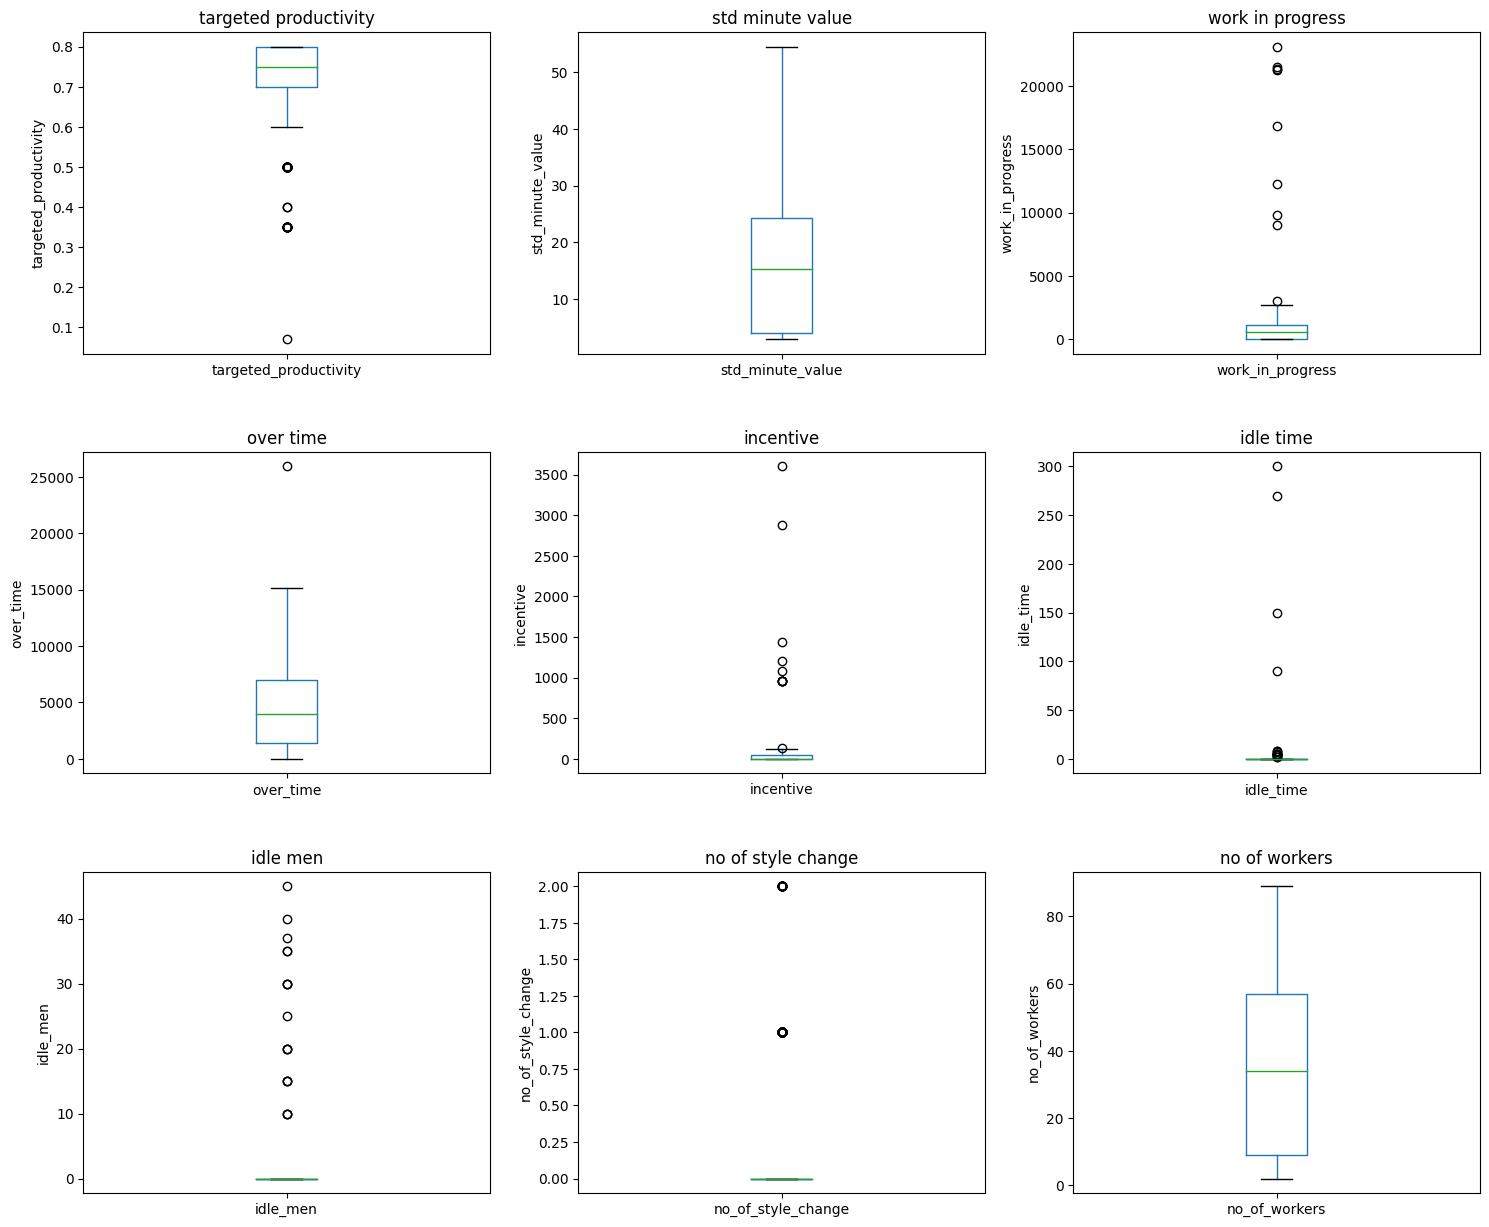

In [18]:
# Checking for outliers in continuous data

#function to remove _ from titles

def title(x):
  return x.replace('_', ' ')

fig,axes = plt.subplots(nrows=3, ncols=3,figsize=(15,8))


#plotting boxplots
for i, ax in enumerate(axes.ravel()):
  garment.boxplot(numerical[i], grid=False, ax=ax)
  ax.set_title(f"{title(numerical[i])}")
  ax.set_ylabel(numerical[i])


fig.tight_layout()
plt.subplots_adjust(top=1.5)
plt.show()

- Outlier of the targeted_productivity might be a recoring error since most of the targeted productivities are around 0.7. So that it can be changed in to 0.7
- Outlier in the overtime is practical ((25920 / 60) / 54 = 8) Each employee can work 8 hours overtime
- Cannot determine anything about the actual_productivity, idle_time, incentive and idle_men since they cannot be determine properly as an error or an actual value
- Actual_produtivity can go beyond 1 as well

In [19]:
garment[garment['over_time'] > 15000]

,date,quarter,department,day,team,targeted_productivity,std_minute_value,work_in_progress,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
138,2015-01-08,Quarter2,sewing,Thursday,12,0.80,11.61,548.0,15120,63,0.0,0,0,31,0.800107
146,2015-01-08,Quarter2,sewing,Thursday,11,0.35,12.52,287.0,25920,38,0.0,0,0,54,0.349951


In [20]:
garment[garment['no_of_workers'] > 60]

,date,quarter,department,day,team,targeted_productivity,std_minute_value,work_in_progress,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
355,2015-01-21,Quarter3,sewing,Wednesday,6,0.8,11.61,916.0,5760,75,0.0,0,0,89,0.850411


In [21]:
garment.loc[(garment['department'] == 'sewing') & (garment['team'] == 6)].no_of_workers.mean()

34.66101694915254

In [22]:
garment.loc[garment['targeted_productivity'] == 0.07, 'targeted_productivity'] = 0.7
garment.loc[garment['no_of_workers'] == 89, 'no_of_workers'] = 35
# change the values of actucal productivity > 1 as 1
# garment['actual_productivity'] = np.where(garment['actual_productivity'] >= 1, 1, garment['actual_productivity'])

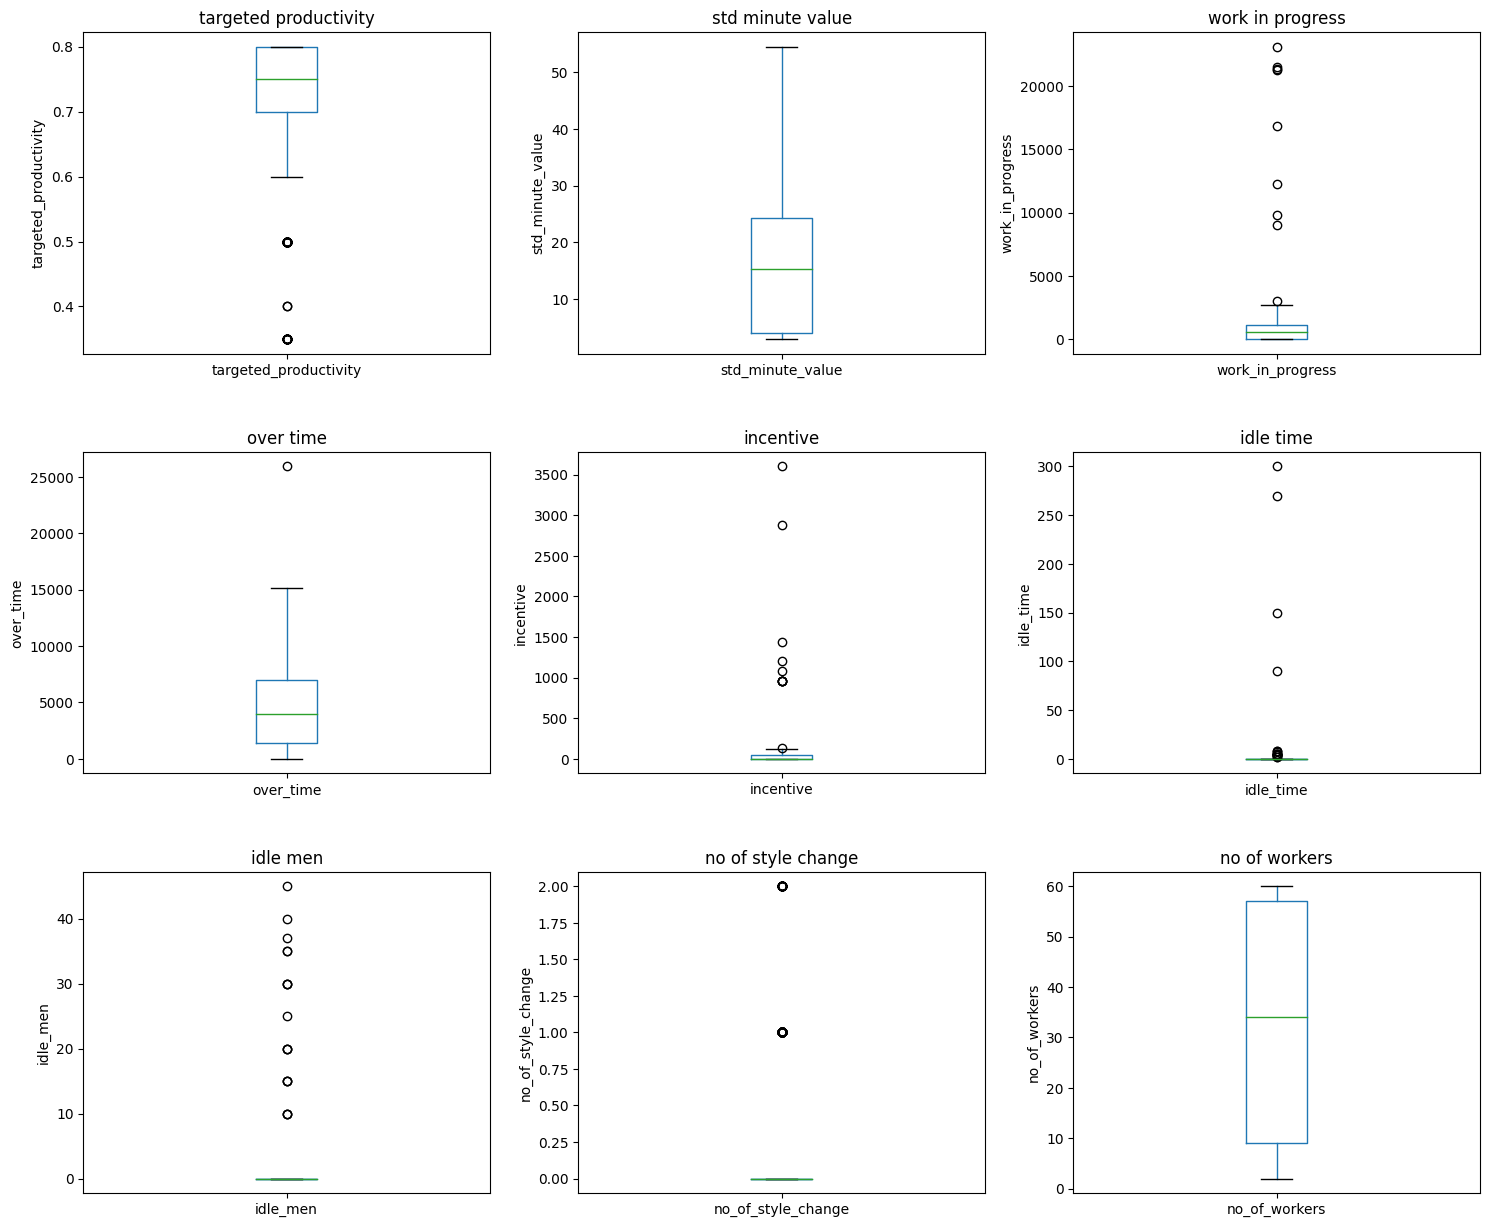

In [23]:
# Checking for outliers in continuous data

#function to remove _ from titles

def title(x):
  return x.replace('_', ' ')

fig,axes = plt.subplots(nrows=3, ncols=3,figsize=(15,8))


#plotting boxplots
for i, ax in enumerate(axes.ravel()):
  garment.boxplot(numerical[i], grid=False, ax=ax)
  ax.set_title(f"{title(numerical[i])}")
  ax.set_ylabel(numerical[i])


fig.tight_layout()
plt.subplots_adjust(top=1.5)
plt.show()

There were outliers in targeted productivity, overtime, work in progress, incentive, idle time, idle men, and actual productivity columns. They will not be dropped as they are likely due to natural variability in the workflow of different teams, where some teams perform significantly above or below average in terms of time, pending work, and productivity. Also, the performance of a particular team can vary on different days, with some days being significantly above or below average.

In [24]:
#saving cleaned data
garment.to_csv('../data/cleaned_productivity.csv',index=False)

### **EDA Process**

#### **Univariate Analysis**

#### **For numerical features**

In [25]:
#statistical summaries of various numerical variables
garment[numerical].describe().T

,count,mean,std,min,25%,50%,75%,max
targeted_productivity,1197.0,0.730159,0.096017,0.350000,0.700000,0.750000,0.800000,0.800000
std_minute_value,1197.0,15.062172,10.943219,2.900000,3.940000,15.260000,24.260000,54.560000
work_in_progress,1197.0,687.228070,1514.582341,0.000000,0.000000,586.000000,1083.000000,23122.000000
over_time,1197.0,4567.460317,3348.823563,0.000000,1440.000000,3960.000000,6960.000000,25920.000000
incentive,1197.0,38.210526,160.182643,0.000000,0.000000,0.000000,50.000000,3600.000000
idle_time,1197.0,0.730159,12.709757,0.000000,0.000000,0.000000,0.000000,300.000000
idle_men,1197.0,0.369256,3.268987,0.000000,0.000000,0.000000,0.000000,45.000000
no_of_style_change,1197.0,0.150376,0.427848,0.000000,0.000000,0.000000,0.000000,2.000000
no_of_workers,1197.0,34.506266,22.096497,2.000000,9.000000,34.000000,57.000000,60.000000
actual_productivity,1197.0,0.735091,0.174488,0.233705,0.650307,0.773333,0.850253,1.120437


Histograms of numerical variables

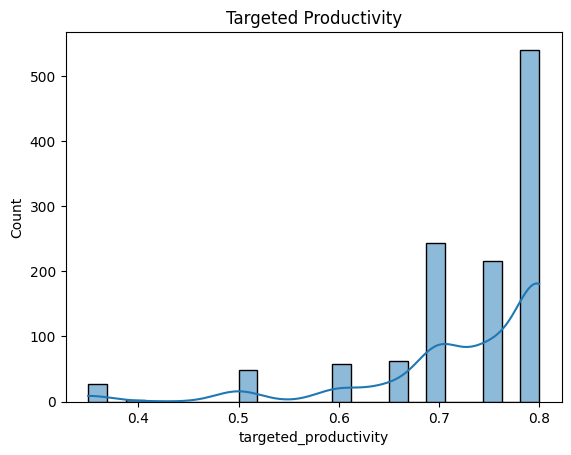

In [26]:
ax = sns.histplot(garment.targeted_productivity, kde = True)
ax.set_title("Targeted Productivity")
plt.show()

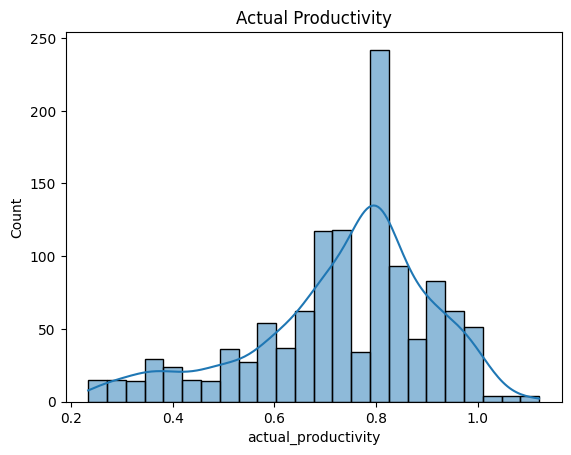

In [27]:
ax = sns.histplot(garment.actual_productivity, kde = True)
ax.set_title("Actual Productivity")
plt.show()

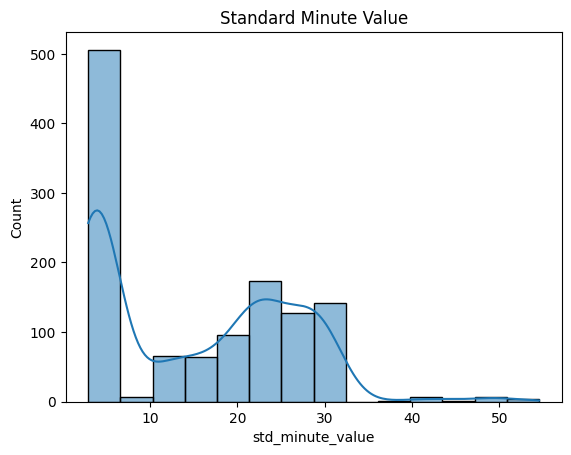

In [28]:
ax = sns.histplot(garment.std_minute_value, kde = True)
ax.set_title("Standard Minute Value")
plt.show()

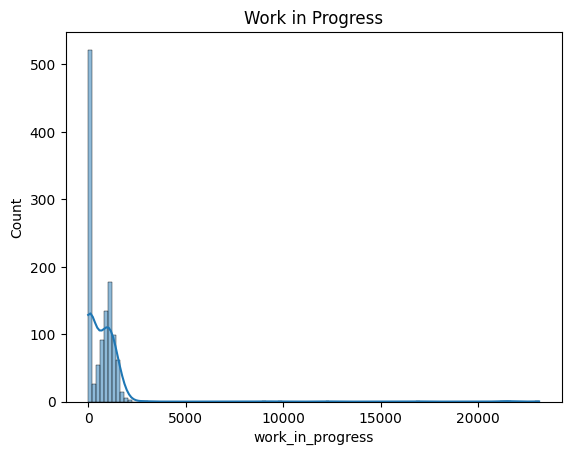

In [29]:
ax = sns.histplot(garment.work_in_progress, kde = True)
ax.set_title("Work in Progress")
plt.show()

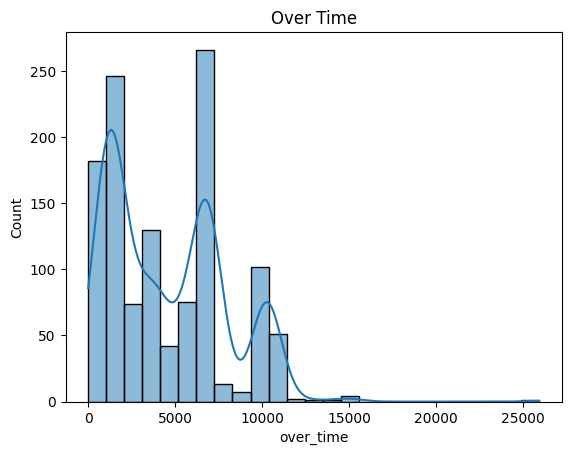

In [30]:
ax = sns.histplot(garment.over_time, kde = True)
ax.set_title("Over Time")
plt.show()

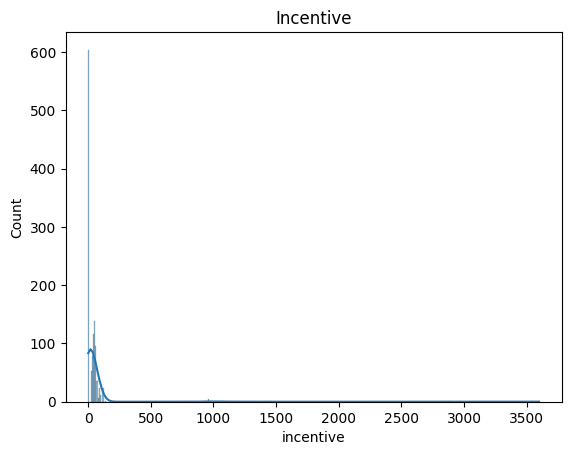

In [31]:
ax = sns.histplot(garment.incentive, kde = True)
ax.set_title("Incentive")
plt.show()

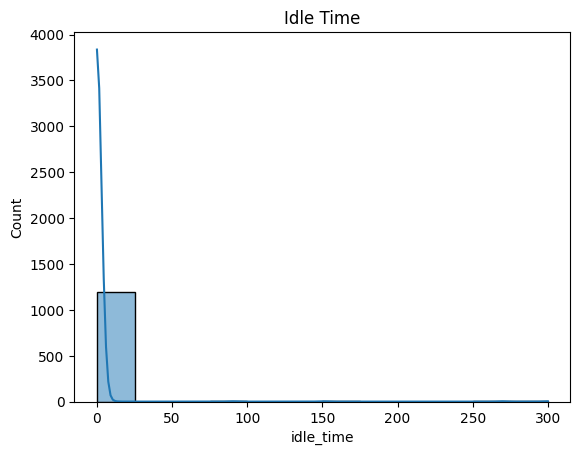

In [32]:
ax = sns.histplot(garment.idle_time, kde = True)
ax.set_title("Idle Time")
plt.show()

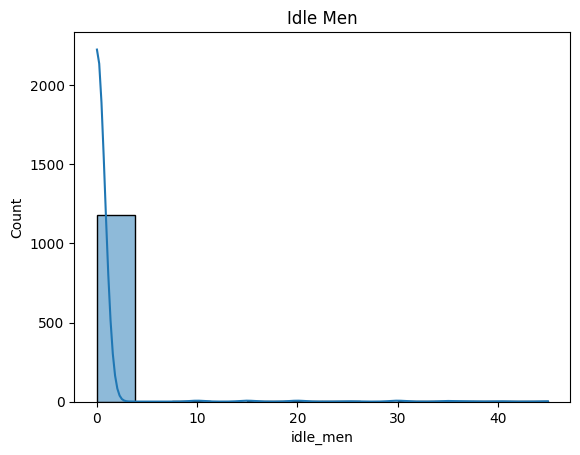

In [33]:
ax = sns.histplot(garment.idle_men, kde = True)
ax.set_title("Idle Men")
plt.show()

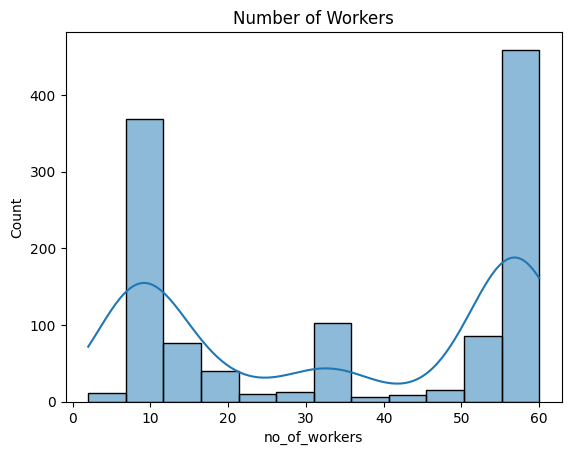

In [34]:
ax = sns.histplot(garment.no_of_workers, kde = True)
ax.set_title("Number of Workers")
plt.show()

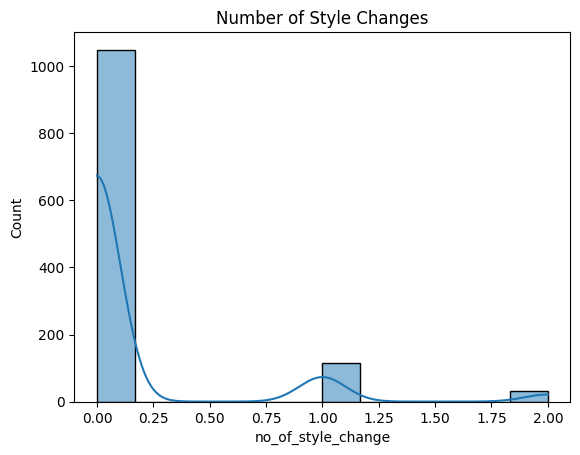

In [35]:
ax = sns.histplot(garment.no_of_style_change, kde = True)
ax.set_title("Number of Style Changes")
plt.show()

In [36]:
numerical

['targeted_productivity',
 'std_minute_value',
 'work_in_progress',
 'over_time',
 'incentive',
 'idle_time',
 'idle_men',
 'no_of_style_change',
 'no_of_workers',
 'actual_productivity']

In [37]:
# zero count in the numerical features

zero_count = [len(garment[garment['targeted_productivity'] == 0]),
              len(garment[garment['std_minute_value'] == 0]),
              len(garment[garment['work_in_progress'] == 0]), 
              len(garment[garment['over_time'] == 0]), 
              len(garment[garment['incentive'] == 0]), 
              len(garment[garment['idle_time'] == 0]), 
              len(garment[garment['idle_men'] == 0]), 
              len(garment[garment['no_of_style_change'] == 0]), 
              len(garment[garment['no_of_workers'] == 0]), 
              len(garment[garment['actual_productivity'] == 0])]

dict = {"numerical_feature": numerical, "zero_count": zero_count}
zero_count_dataset = pd.DataFrame(dict)

zero_count_dataset['zero_percentatge'] = zero_count_dataset['zero_count'] / len(garment) * 100
zero_count_dataset

,numerical_feature,zero_count,zero_percentatge
0,targeted_productivity,0,0.000000
1,std_minute_value,0,0.000000
2,work_in_progress,506,42.272348
3,over_time,31,2.589808
4,incentive,604,50.459482
5,idle_time,1179,98.496241
6,idle_men,1179,98.496241
7,no_of_style_change,1050,87.719298
8,no_of_workers,0,0.000000
9,actual_productivity,0,0.000000


In [38]:
# pd.options.display.float_format(None)
from scipy.stats import shapiro
from scipy.stats import kstest

y = np.empty(10, dtype=object) 

# calculate the shapiro test p value
for i in range(0, 10):
    y[i] = shapiro(garment[numerical[i]])[1]

result = {'Numerical Feature': numerical, 'Shapiro Result p-value': y}
pd.DataFrame(result)

# print(kstest(garment['actual_productivity'], 'norm'))

,Numerical Feature,Shapiro Result p-value
0,targeted_productivity,0.0
1,std_minute_value,0.0
2,work_in_progress,0.0
3,over_time,0.0
4,incentive,0.0
5,idle_time,0.0
6,idle_men,0.0
7,no_of_style_change,0.0
8,no_of_workers,0.0
9,actual_productivity,0.0


In [39]:
y

array([1.7456255229787111e-40, 1.5806751459589165e-31, 0.0,
       9.319384719011329e-27, 0.0, 0.0, 0.0, 0.0, 1.5718811047762514e-37,
       6.876279730732294e-21], dtype=object)

- Since all the p-value are less than .05, we reject the null hypothesis of the Shapiro-Wilk test.
- This means we have sufficient evidence to say that the sample data does not come from a normal distribution

#### For categorical features

In [40]:
garment.head()

,date,quarter,department,day,team,targeted_productivity,std_minute_value,work_in_progress,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,2015-01-01,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59,0.940725
1,2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,0,0,8,0.886500
2,2015-01-01,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30,0.800570
3,2015-01-01,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30,0.800570
4,2015-01-01,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56,0.800382


In [41]:
# create a new feature as department_team_no for analys the teams according to the department
garment.insert(4, 'department_team', garment['department'].astype(str) + '_' + garment['team'].astype(str))

(-1.25, 1.25, -1.25, 1.25)

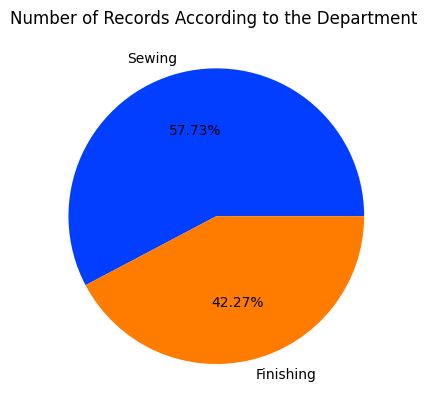

In [42]:
size = garment.department.value_counts()
labels = 'Sewing', 'Finishing'
explode = [0, 0]

plt.pie(size, colors = sns.color_palette('bright'),labels = labels,autopct = '%.2f%%', explode=explode)
plt.title('Number of Records According to the Department ', fontsize = 12)
plt.axis('off')

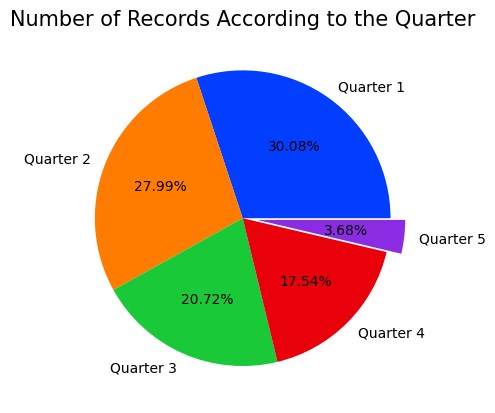

In [43]:
size = garment.quarter.value_counts()
labels = ['Quarter 1', 'Quarter 2', 'Quarter 3', 'Quarter 4', 'Quarter 5']
explode = [0, 0, 0, 0, 0.1]

plt.pie(size, colors = sns.color_palette('bright'),labels = labels,autopct = '%.2f%%', explode=explode)
plt.title('Number of Records According to the Quarter', fontsize = 15)
plt.axis('off')
plt.show()

- Since Quarter 5 contains only smal numebr of values we can add them into Quarter 4

In [44]:
garment.day.value_counts()

day
Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: count, dtype: int64

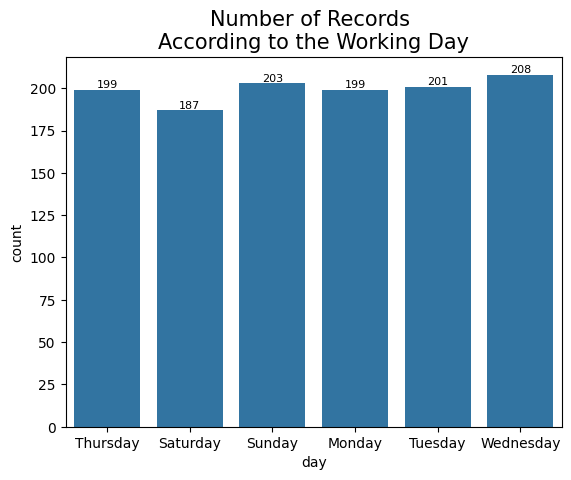

In [45]:
ax = sns.countplot(data = garment, x = 'day')
ax.bar_label(ax.containers[0], fontsize=8)
plt.title('Number of Records \nAccording to the Working Day', fontsize = 15)
plt.show()

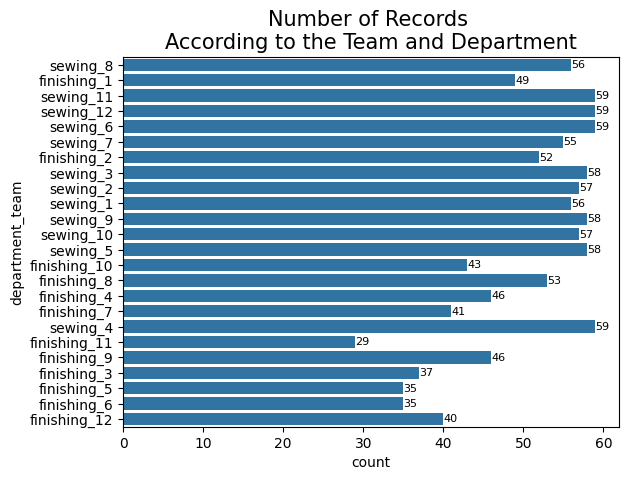

In [46]:
ax = sns.countplot(data = garment, y = 'department_team')
ax.bar_label(ax.containers[0], fontsize=8)
plt.title('Number of Records \nAccording to the Team and Department', fontsize = 15)
plt.show()

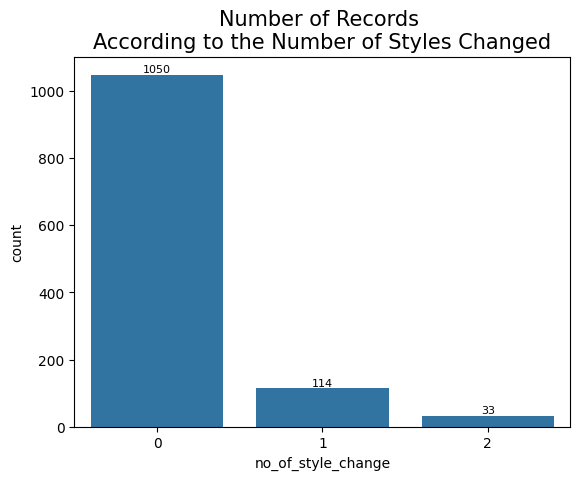

In [47]:
ax = sns.countplot(data = garment, x = 'no_of_style_change')
ax.bar_label(ax.containers[0], fontsize=8)
plt.title('Number of Records \nAccording to the Number of Styles Changed', fontsize = 15)
plt.show()

Observations:
* Quarter one had the most records in the dataset
* There were more records related to the sewing department than the finishing department
* The day of the week with the most records is Wednesday
* For most records, the number of changes in the style of a particular product was 0

In [48]:
categorical

['quarter', 'department', 'day', 'team']

### **Bivariate Analysis**

Targeted Productivity and Actual Productivity

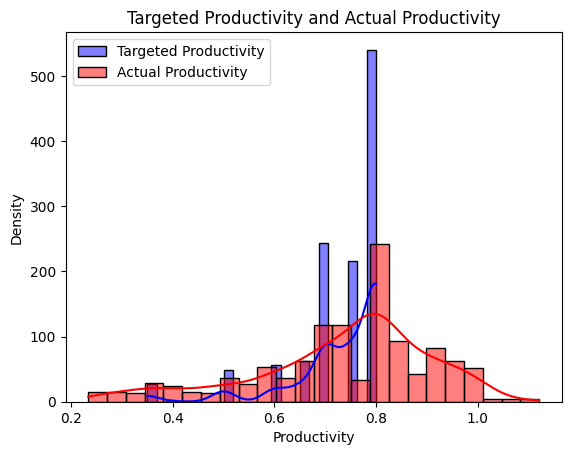

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
# ax = sns.distplot(garment.targeted_productivity)
# ax.set_title("Targeted Productivity and Actual Productivity")

sns.histplot(garment.targeted_productivity, color='blue', alpha=0.5, kde=True, label='Targeted Productivity')
sns.histplot(garment.actual_productivity, color='red', alpha=0.5, kde=True, label='Actual Productivity')

# Adding labels and legend
plt.xlabel('Productivity')
plt.title('Targeted Productivity and Actual Productivity')
plt.ylabel('Density')
plt.legend()

plt.show()

Actual Productivity by day of week, department, Quarter of the month, team

In [50]:
categorical = ["quarter", "department", "day", "department_team", "no_of_style_change"]

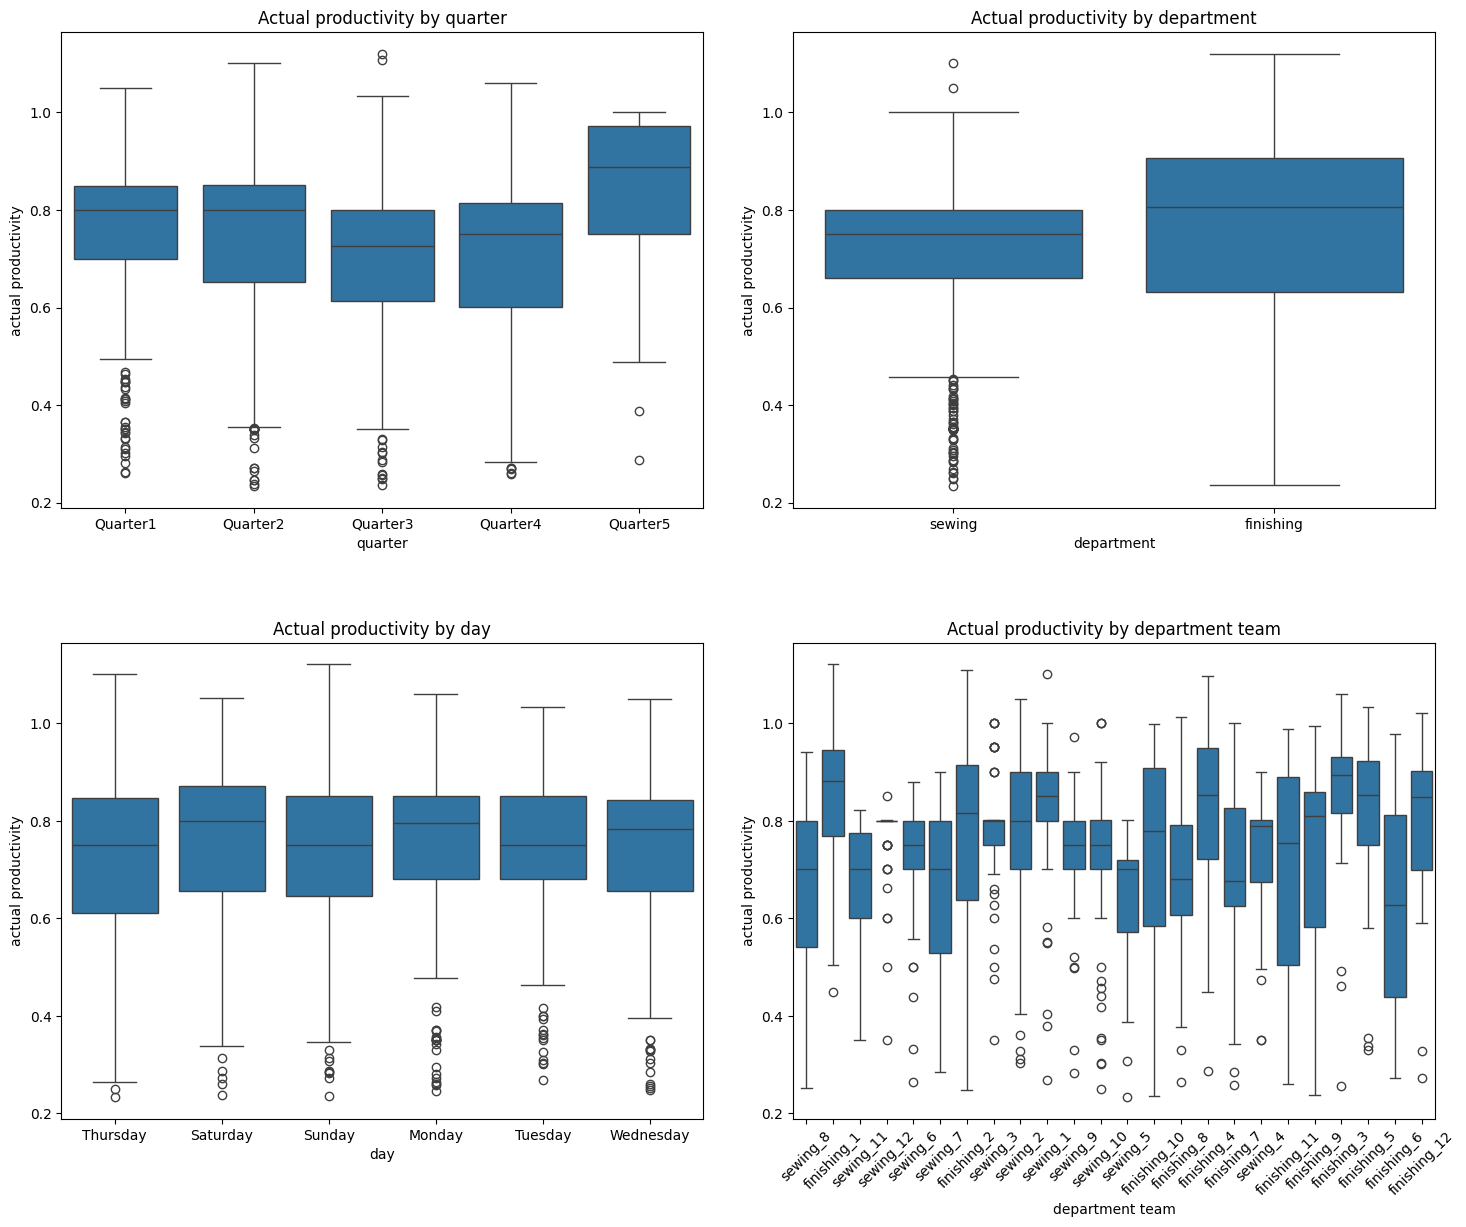

In [51]:
fig,axes = plt.subplots(nrows = 2, ncols = 2, figsize = (12,8))

for i, ax in enumerate(axes.ravel()):
  # if i <= 2:
    sns.boxplot(data = garment, x = categorical[i], y = 'actual_productivity', ax = ax)
    ax.set_title(f"Actual productivity by {title(categorical[i])}")
    ax.set_xlabel(title(categorical[i]))
    plt.xticks(rotation=45)
    ax.set_ylabel("actual productivity")

fig.tight_layout()
plt.subplots_adjust(top=1.5,right=1.2)
plt.show()

Observations:

The median actual productivity is highest:

* Quarters: during the first 2 quarters of the month.
* Department: in the "finishing" department
* Day: on Saturdays

In [52]:
garment['date'] = pd.to_datetime(garment['date'])

**Camprison between Actual and Targeted Productivity over time**

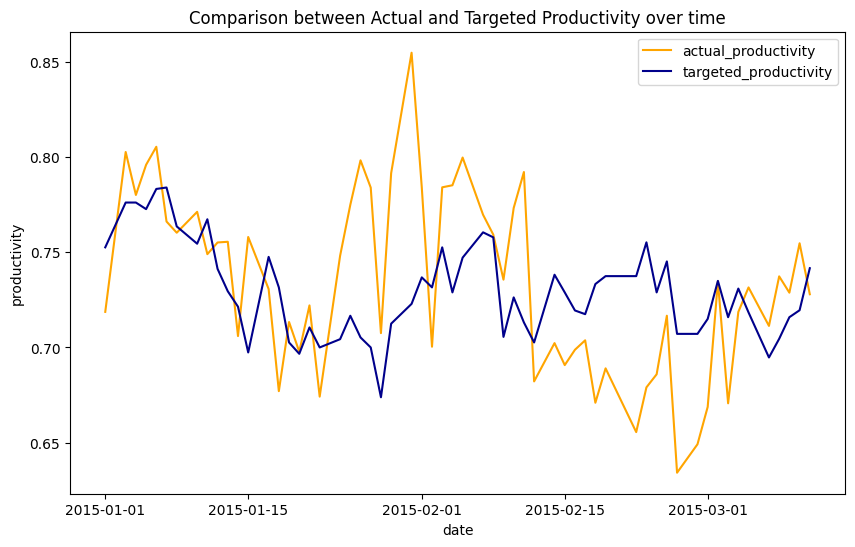

In [53]:
# Line plot to check actual and targeted productivity
plt.figure(figsize = (10,6))

sns.lineplot(x = 'date', y = 'actual_productivity', data = garment, ci = None, color = 'orange', errorbar=None)
sns.lineplot(x = 'date', y = 'targeted_productivity', data = garment, ci = None, color = 'darkblue', errorbar=None)

plt.legend(labels = ['actual_productivity','targeted_productivity'])
plt.ylabel("productivity")
plt.title("Comparison between Actual and Targeted Productivity over time")
plt.show()

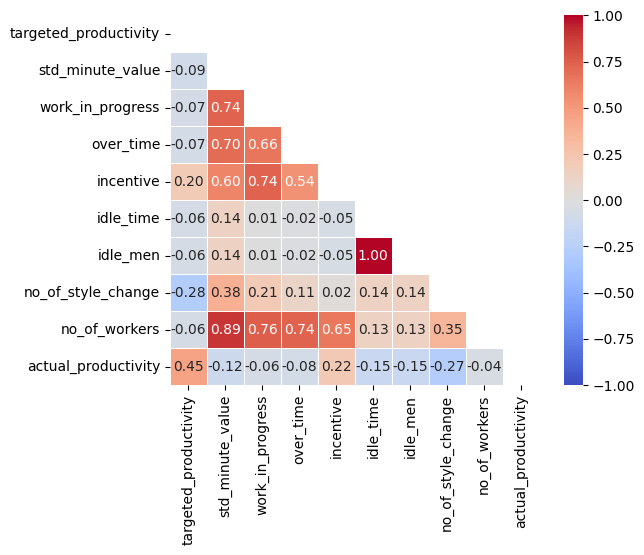

In [54]:
# print(garment[numerical].corr()) 
  
# plotting correlation heatmap 
# dataplot = sns.heatmap(garment[numerical].corr(), cmap="coolwarm", annot=True)
mask = np.triu(np.ones_like(garment[numerical].corr(method = 'spearman'), dtype=bool))

dataplot = sns.heatmap(garment[numerical].corr(method = 'spearman'),cmap = 'coolwarm', 
                       vmin = -1, vmax = 1, center = 0, annot = True, fmt=".2f", 
                       square=True, linewidths = 0.5, mask = mask)
  
# displaying heatmap 
plt.show()

* Targeted productivity has a moderate correlation with actual productivity
* standard minute value has very strong positive correlations with number of workers and a positive correlation with overtime, incentive and work in progress
* work in progress has strong positive correlation with number of workers, incentive and overtime 
* Over time has a strong positive correlation with number of workers and incentive
* Idle time and idle men have a strong positive correlation
* Incentive and number of workers are strongly positively correlated

### **Modeling**

Regression model to predict the actual productivity

In [55]:
# from sklearn.model_selection import KFold
import scipy as sp
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import OneHotEncoder

In [56]:
garment.columns

Index(['date', 'quarter', 'department', 'day', 'department_team', 'team',
       'targeted_productivity', 'std_minute_value', 'work_in_progress',
       'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change',
       'no_of_workers', 'actual_productivity'],
      dtype='object')

In [57]:
garment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1197 non-null   datetime64[ns]
 1   quarter                1197 non-null   object        
 2   department             1197 non-null   object        
 3   day                    1197 non-null   object        
 4   department_team        1197 non-null   object        
 5   team                   1197 non-null   int64         
 6   targeted_productivity  1197 non-null   float64       
 7   std_minute_value       1197 non-null   float64       
 8   work_in_progress       1197 non-null   float64       
 9   over_time              1197 non-null   int64         
 10  incentive              1197 non-null   int64         
 11  idle_time              1197 non-null   float64       
 12  idle_men               1197 non-null   int64         
 13  no_

In [58]:
garment['team'] = garment['team'].astype(str)
# garment['no_of_style_change'] = garment['no_of_style_change'].astype(str)

In [59]:
garment_updated = garment.drop(['date'], axis = 1)

In [60]:
garment_updated['incentive'].value_counts()

incentive
0       604
50      113
63       61
45       54
30       52
23       38
38       29
60       28
40       27
75       24
113      21
88       19
34       17
56       14
26        9
100       7
55        7
81        7
69        6
65        6
70        6
35        5
960       5
94        4
44        4
90        3
24        2
27        2
49        2
119       2
46        2
1080      1
1440      1
2880      1
3600      1
32        1
1200      1
62        1
98        1
33        1
138       1
93        1
53        1
29        1
21        1
37        1
54        1
25        1
Name: count, dtype: int64

In [61]:
# garment.loc[garment['incentive'] == 0, 'incentive'] = garment['incentive'].mean()
# garment.loc[garment['over_time'] == 0, 'over_time'] = garment['over_time'].mean()

In [62]:
garment['over_time'].value_counts()

over_time
960      129
1440     111
6960      61
6840      48
1200      39
        ... 
4140       1
12180      1
10770      1
12000      1
3120       1
Name: count, Length: 143, dtype: int64

In [63]:
zero_count_dataset

,numerical_feature,zero_count,zero_percentatge
0,targeted_productivity,0,0.000000
1,std_minute_value,0,0.000000
2,work_in_progress,506,42.272348
3,over_time,31,2.589808
4,incentive,604,50.459482
5,idle_time,1179,98.496241
6,idle_men,1179,98.496241
7,no_of_style_change,1050,87.719298
8,no_of_workers,0,0.000000
9,actual_productivity,0,0.000000


In [64]:
#saving cleaned data
garment.to_csv('../data/cleaned_productivity.csv',index=False)

In [65]:
garment_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   quarter                1197 non-null   object 
 1   department             1197 non-null   object 
 2   day                    1197 non-null   object 
 3   department_team        1197 non-null   object 
 4   team                   1197 non-null   object 
 5   targeted_productivity  1197 non-null   float64
 6   std_minute_value       1197 non-null   float64
 7   work_in_progress       1197 non-null   float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   int64  
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [66]:
updated_numerical = [feature for feature in garment_updated.columns if garment[feature].dtype != 'O']
updated_categorical = [feature for feature in garment_updated.columns if garment[feature].dtype == 'O']


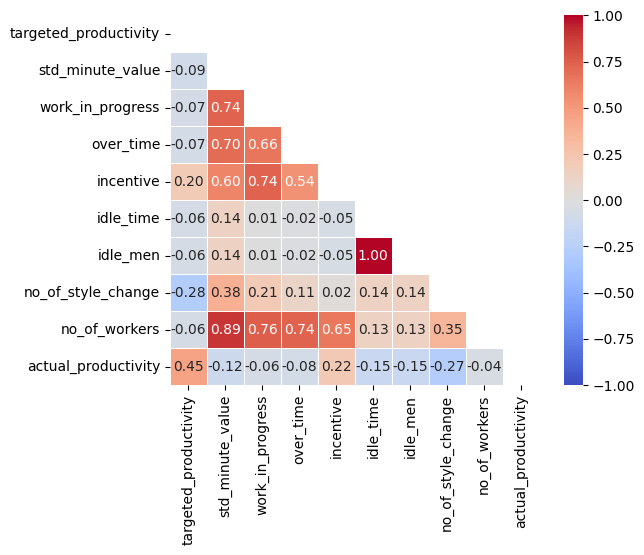

In [67]:
mask = np.triu(np.ones_like(garment[numerical].corr(method = 'spearman'), dtype=bool))

dataplot = sns.heatmap(garment[numerical].corr(method = 'spearman'),cmap = 'coolwarm', 
                       vmin = -1, vmax = 1, center = 0, annot = True, fmt=".2f", 
                       square=True, linewidths = 0.5, mask = mask)
  
# displaying heatmap 
plt.show()

In [68]:
categorical

['quarter', 'department', 'day', 'department_team', 'no_of_style_change']

In [69]:
# Preparing X and Y variables

# X = garment_updated['targeted_productivity']
X = garment_updated.drop(columns = ['actual_productivity'], axis = 1)
y = garment_updated['actual_productivity']



In [70]:
data_numerical_columns = ['targeted_productivity', 'std_minute_value', 'work_in_progress', 'incentive', 'actual_productivity']

In [71]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   quarter                1197 non-null   object 
 1   department             1197 non-null   object 
 2   day                    1197 non-null   object 
 3   department_team        1197 non-null   object 
 4   team                   1197 non-null   object 
 5   targeted_productivity  1197 non-null   float64
 6   std_minute_value       1197 non-null   float64
 7   work_in_progress       1197 non-null   float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   int64  
dtypes: float64(4), int64(5), object(5)
memory usage: 131.0+ 

In [72]:
num_features = X.select_dtypes(exclude = 'object').columns
cat_features = X.select_dtypes(include = 'object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = MinMaxScaler()
one_hot_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", one_hot_transformer, cat_features), 
        ("StandardScaler", numeric_transformer, num_features),
    ]
)

In [73]:
X_trans = preprocessor.fit_transform(X)

In [74]:
X_trans.shape

(1197, 58)

In [75]:
X_trans[1]

<1x58 sparse matrix of type '<class 'numpy.float64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((957, 58), (240, 58))

In [77]:

from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [78]:
# evaluation metric after model training
def model_evaluation(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [79]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(alpha=0.001),
    "Ridge": Ridge(random_state=0),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = model_evaluation(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = model_evaluation(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.1386
- Mean Absolute Error: 0.0980
- R2 Score: 0.3874
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1446
- Mean Absolute Error: 0.1045
- R2 Score: 0.2127


Lasso
Model performance for Training set
- Root Mean Squared Error: 0.1440
- Mean Absolute Error: 0.1020
- R2 Score: 0.3389
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1465
- Mean Absolute Error: 0.1050
- R2 Score: 0.1915


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.1391
- Mean Absolute Error: 0.0983
- R2 Score: 0.3829
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1450
- Mean Absolute Error: 0.1044
- R2 Score: 0.2080


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.1275
- Mean Absolute Error: 0.0921
- R2 Score: 0.4814
-----------------------

In [80]:
pd.DataFrame(list(zip(model_list, r2_list, )), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
5,Random Forest Regressor,0.516263
7,CatBoosting Regressor,0.420185
6,XGBRegressor,0.374944
8,AdaBoost Regressor,0.296041
4,Decision Tree,0.285077
0,Linear Regression,0.212718
2,Ridge,0.207967
1,Lasso,0.191550
3,K-Neighbors Regressor,0.099451


### Random foreset regressor

In [81]:
model_test = RandomForestRegressor(n_estimators =180, random_state=0, max_depth=15)
model_test.fit(X_train, y_train)

y_train_pred_test = model_test.predict(X_train)
y_test_pred_test = model_test.predict(X_test)

model_train_mae_1 , model_train_rmse_1, model_train_r2_1 = model_evaluation(y_train, y_train_pred_test)
model_test_mae_1 , model_test_rmse_1, model_test_r2_1 = model_evaluation(y_test, y_test_pred_test)

print('Model performance for Training set')
print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse_1))
print("- Mean Absolute Error: {:.4f}".format(model_train_mae_1))
print("- R2 Score: {:.4f}".format(model_train_r2_1))

print('\nModel performance for Testing set')
print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse_1))
print("- Mean Absolute Error: {:.4f}".format(model_test_mae_1))
print("- R2 Score: {:.4f}".format(model_test_r2_1))

Model performance for Training set
- Root Mean Squared Error: 0.0497
- Mean Absolute Error: 0.0303
- R2 Score: 0.9214

Model performance for Testing set
- Root Mean Squared Error: 0.1123
- Mean Absolute Error: 0.0707
- R2 Score: 0.5252


In [82]:
## for all don't change

model_test = RandomForestRegressor(n_estimators = 80, random_state=0, max_depth=10)
model_test.fit(X_train, y_train)

y_train_pred_test = model_test.predict(X_train)
y_test_pred_test = model_test.predict(X_test)

model_train_mae_1 , model_train_rmse_1, model_train_r2_1 = model_evaluation(y_train, y_train_pred_test)
model_test_mae_1 , model_test_rmse_1, model_test_r2_1 = model_evaluation(y_test, y_test_pred_test)

print('Model performance for Training set')
print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse_1))
print("- Mean Absolute Error: {:.4f}".format(model_train_mae_1))
print("- R2 Score: {:.4f}".format(model_train_r2_1))

print('\nModel performance for Testing set')
print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse_1))
print("- Mean Absolute Error: {:.4f}".format(model_test_mae_1))
print("- R2 Score: {:.4f}".format(model_test_r2_1))

Model performance for Training set
- Root Mean Squared Error: 0.0703
- Mean Absolute Error: 0.0434
- R2 Score: 0.8425

Model performance for Testing set
- Root Mean Squared Error: 0.1108
- Mean Absolute Error: 0.0712
- R2 Score: 0.5374


In [83]:
test_prediction = pd.DataFrame(list(zip(y_test, y_test_pred_test)), columns=['y_test', 'y_prediction'])
test_prediction

train_prediction = pd.DataFrame(list(zip(y_train, y_train_pred_test)), columns=['y_train', 'y_train_prediction'])
train_prediction

,y_train,y_train_prediction
0,0.700505,0.698586
1,0.504596,0.742625
2,0.763375,0.744939
3,1.096633,0.943036
4,0.800107,0.799474
...,...,...
952,0.354444,0.463942
953,0.797500,0.651855
954,0.864343,0.838317
955,0.611141,0.597022


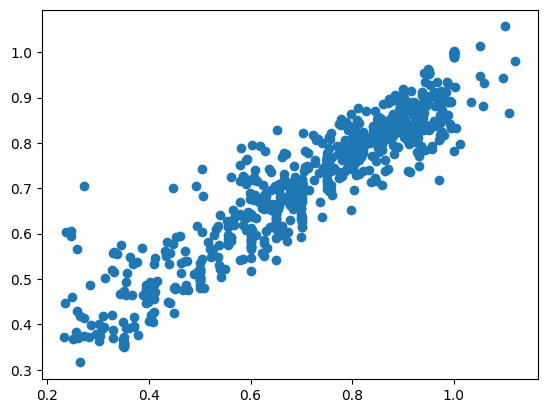

In [84]:
plt.scatter(train_prediction['y_train'], train_prediction['y_train_prediction'])
plt.show()

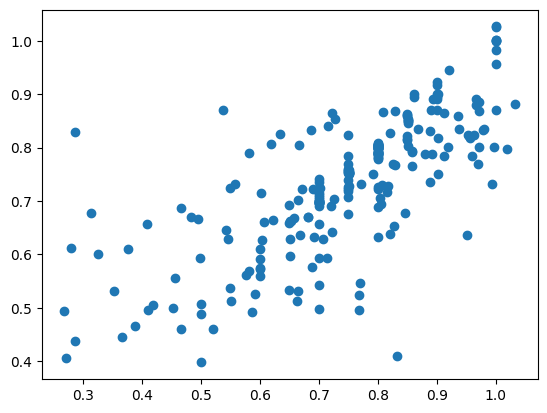

In [85]:
plt.scatter(test_prediction['y_test'], test_prediction['y_prediction'])
plt.show()

In [86]:
cat_test = CatBoostRegressor(iterations= 1000, learning_rate=0.01, verbose=False, depth = 10)
cat_test.fit(X_train, y_train)

y_train_pred_test = cat_test.predict(X_train)
y_test_pred_test = cat_test.predict(X_test)

model_train_mae_1 , model_train_rmse_1, model_train_r2_1 = model_evaluation(y_train, y_train_pred_test)
model_test_mae_1 , model_test_rmse_1, model_test_r2_1 = model_evaluation(y_test, y_test_pred_test)

print('Model performance for Training set')
print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse_1))
print("- Mean Absolute Error: {:.4f}".format(model_train_mae_1))
print("- R2 Score: {:.4f}".format(model_train_r2_1))

print('\nModel performance for Testing set')
print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse_1))
print("- Mean Absolute Error: {:.4f}".format(model_test_mae_1))
print("- R2 Score: {:.4f}".format(model_test_r2_1))

Model performance for Training set
- Root Mean Squared Error: 0.0706
- Mean Absolute Error: 0.0465
- R2 Score: 0.8410

Model performance for Testing set
- Root Mean Squared Error: 0.1135
- Mean Absolute Error: 0.0739
- R2 Score: 0.5145


In [87]:
# don't change
cat_test = CatBoostRegressor(iterations= 1000, learning_rate=0.01, verbose=False, depth = 10)
cat_test.fit(X_train, y_train)

y_train_pred_test = cat_test.predict(X_train)
y_test_pred_test = cat_test.predict(X_test)

model_train_mae_1 , model_train_rmse_1, model_train_r2_1 = model_evaluation(y_train, y_train_pred_test)
model_test_mae_1 , model_test_rmse_1, model_test_r2_1 = model_evaluation(y_test, y_test_pred_test)

print('Model performance for Training set')
print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse_1))
print("- Mean Absolute Error: {:.4f}".format(model_train_mae_1))
print("- R2 Score: {:.4f}".format(model_train_r2_1))

print('\nModel performance for Testing set')
print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse_1))
print("- Mean Absolute Error: {:.4f}".format(model_test_mae_1))
print("- R2 Score: {:.4f}".format(model_test_r2_1))

Model performance for Training set
- Root Mean Squared Error: 0.0706
- Mean Absolute Error: 0.0465
- R2 Score: 0.8410

Model performance for Testing set
- Root Mean Squared Error: 0.1135
- Mean Absolute Error: 0.0739
- R2 Score: 0.5145


In [88]:
X = garment_updated.drop(columns = ['actual_productivity'], axis = 1)
y = garment_updated['actual_productivity']

In [89]:
garment_updated.columns

Index(['quarter', 'department', 'day', 'department_team', 'team',
       'targeted_productivity', 'std_minute_value', 'work_in_progress',
       'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change',
       'no_of_workers', 'actual_productivity'],
      dtype='object')

In [90]:
num_features = X.select_dtypes(exclude = 'object').columns
cat_features = X.select_dtypes(include = 'object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
one_hot_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", one_hot_transformer, cat_features), 
        ("StandardScaler", numeric_transformer, num_features),
    ]
)

In [91]:
X_trans = preprocessor.fit_transform(X)

In [92]:
X_trans.shape

(1197, 58)

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((957, 58), (240, 58))

In [94]:
model_test = RandomForestRegressor(n_estimators = 80, random_state=0, min_samples_split = 10, max_depth=8)
model_test.fit(X_train, y_train)

y_train_pred_test = model_test.predict(X_train)
y_test_pred_test = model_test.predict(X_test)

model_train_mae_1 , model_train_rmse_1, model_train_r2_1 = model_evaluation(y_train, y_train_pred_test)
model_test_mae_1 , model_test_rmse_1, model_test_r2_1 = model_evaluation(y_test, y_test_pred_test)

print('Model performance for Training set')
print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse_1))
print("- Mean Absolute Error: {:.4f}".format(model_train_mae_1))
print("- R2 Score: {:.4f}".format(model_train_r2_1))

print('\nModel performance for Testing set')
print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse_1))
print("- Mean Absolute Error: {:.4f}".format(model_test_mae_1))
print("- R2 Score: {:.4f}".format(model_test_r2_1))

Model performance for Training set
- Root Mean Squared Error: 0.0953
- Mean Absolute Error: 0.0605
- R2 Score: 0.7105

Model performance for Testing set
- Root Mean Squared Error: 0.1107
- Mean Absolute Error: 0.0720
- R2 Score: 0.5385


In [95]:
from sklearn.ensemble import GradientBoostingRegressor

model_test = GradientBoostingRegressor(n_estimators=300, learning_rate=0.1, max_depth=5)
model_test.fit(X_train, y_train)

y_train_pred_test = model_test.predict(X_train)
y_test_pred_test = model_test.predict(X_test)

model_train_mae_1 , model_train_rmse_1, model_train_r2_1 = model_evaluation(y_train, y_train_pred_test)
model_test_mae_1 , model_test_rmse_1, model_test_r2_1 = model_evaluation(y_test, y_test_pred_test)

print('Model performance for Training set')
print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse_1))
print("- Mean Absolute Error: {:.4f}".format(model_train_mae_1))
print("- R2 Score: {:.4f}".format(model_train_r2_1))

print('\nModel performance for Testing set')
print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse_1))
print("- Mean Absolute Error: {:.4f}".format(model_test_mae_1))
print("- R2 Score: {:.4f}".format(model_test_r2_1))

Model performance for Training set
- Root Mean Squared Error: 0.0285
- Mean Absolute Error: 0.0172
- R2 Score: 0.9741

Model performance for Testing set
- Root Mean Squared Error: 0.1298
- Mean Absolute Error: 0.0804
- R2 Score: 0.3652


In [96]:
# # List of tuples with variable and importance using the gbc tuned model (the best recall)
# importances = model_test.feature_importances_
# feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X.columns, importances)]

# #sorting the values in descending order
# feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# # Printing out the feature and importances 
# for feat, signif in feature_importances:
#   print(f'Variable: {feat}, Importance: {signif}') 

# # Making a bar chart
# plt.bar(X.columns, importances) 
# # Tick labels for x axis
# plt.xticks(rotation='vertical')

# plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

## Neural Network

In [97]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [98]:
# Create a Model Class that inherits nn.Module
class Model(nn.Module):
  # Input layer (30 features) -->
  # Hidden Layer1 (64 neurons) -->
  # H2 (32 neurons) -->
  # output value

  def __init__(self, in_features=34, h1=64, h2=32, out_features=1):
    super().__init__() # instantiate our nn.Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    x = F.sigmoid(x)

    return x


In [99]:
# Pick a manual seed for randomization
torch.manual_seed(41)
# Create an instance of model
model = Model()